# Assignment 1 - Experiments with Machine Learning
Alice Chen
Georgia Pitic
Ryan Kim

Path: deliverable.ipynb

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier

### 1. Load Data

In [61]:
# a. methods of convertion
# i. Convert dummy coded data

dataAbalone = pd.read_csv('abalone.csv')
dataPenguins = pd.read_csv('penguins.csv')
dataPenguins = pd.get_dummies(dataPenguins, columns=['island', 'sex'])
dataPenguins.to_csv('penguins_with_dummies.csv', index=False)

dataPenguinsWithDummy = pd.read_csv('penguins_with_dummies.csv')


### 2. Plot the percentages of each class

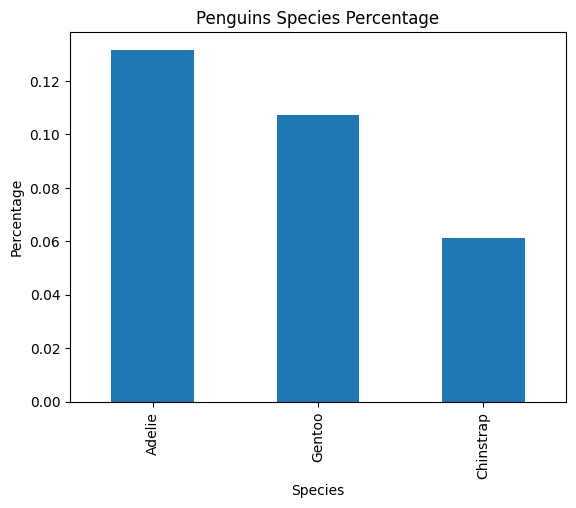

In [62]:
# Penguines plot percentage
dataPenguinsPercentage = (dataPenguinsWithDummy['species'].value_counts(
    normalize=True) / len(dataPenguinsWithDummy)) * 100

dataPenguinsPercentage.plot(kind='bar')
plt.title('Penguins Species Percentage')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.savefig('penguinsPercentage.png')
plt.show()

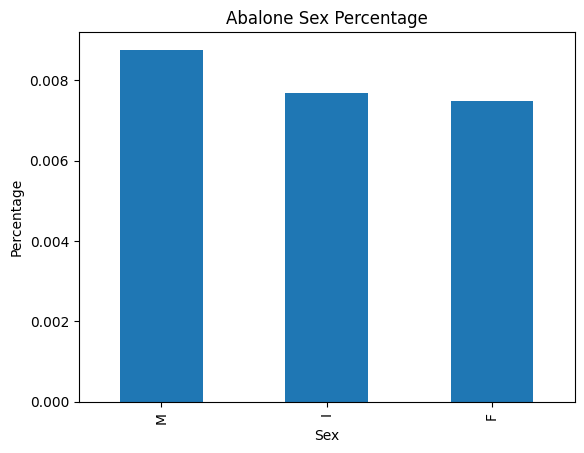

In [63]:
# Abalone plot percentage
dataAbalonePercentage = (dataAbalone['Type'].value_counts(
    normalize=True) / len(dataAbalone)) * 100

dataAbalonePercentage.plot(kind='bar')
plt.title('Abalone Sex Percentage')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('abalonePercentage.png')
plt.show()

### 3. Split dataset using train test split

In [64]:
# a. Penguins
X_penguins = dataPenguinsWithDummy.drop(['species'], axis=1)
y_penguins = dataPenguinsWithDummy['species']
X_penguinsTrain, X_penguinsTest, y_penguinsTrain, y_penguinsTest = train_test_split(X_penguins, y_penguins)

# b. Abalone
X_abalone = dataAbalone.drop(['Type'], axis=1)
y_abalone = dataAbalone['Type']
X_abaloneTrain, X_abaloneTest, y_abaloneTrain, y_abaloneTest = train_test_split(X_abalone, y_abalone)

### 4. Train and test 4 different classifiers

#### 4a Base DT

[Text(0.640625, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.639\nsamples = 249\nvalue = [107, 50, 92]'),
 Text(0.46875, 0.75, 'x[0] <= 43.3\ngini = 0.429\nsamples = 154\nvalue = [106, 48, 0]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <= 42.25\ngini = 0.054\nsamples = 108\nvalue = [105, 3, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 16.7\ngini = 0.02\nsamples = 101\nvalue = [100, 1, 0]'),
 Text(0.125, 0.25, 'x[0] <= 39.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[8] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.625, 0.5833333333333334, 'x[5] <= 0.5\ngini = 0.043\nsam

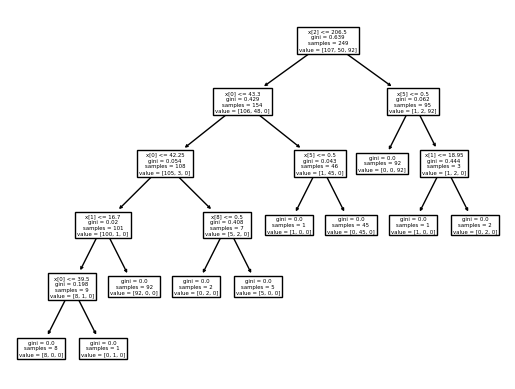

In [65]:
dtc_penguins = tree.DecisionTreeClassifier()
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)

# i. Penguins
dtc_penguins.fit(X_penguinsTrain, y_penguinsTrain)
tree.plot_tree(dtc_penguins)


[Text(0.5, 0.9, 'x[5] <= 0.131\ngini = 0.665\nsamples = 3132\nvalue = [991, 1002, 1139]'),
 Text(0.25, 0.7, 'x[7] <= 8.5\ngini = 0.501\nsamples = 1162\nvalue = [160, 771, 231]'),
 Text(0.125, 0.5, 'x[6] <= 0.127\ngini = 0.349\nsamples = 804\nvalue = [57, 637, 110]'),
 Text(0.0625, 0.3, 'x[7] <= 6.5\ngini = 0.279\nsamples = 621\nvalue = [29, 522, 70]'),
 Text(0.03125, 0.1, 'gini = 0.211\nsamples = 319\nvalue = [11, 282, 26]'),
 Text(0.09375, 0.1, 'gini = 0.344\nsamples = 302\nvalue = [18, 240, 44]'),
 Text(0.1875, 0.3, 'x[2] <= 0.163\ngini = 0.534\nsamples = 183\nvalue = [28, 115, 40]'),
 Text(0.15625, 0.1, 'gini = 0.523\nsamples = 180\nvalue = [25, 115, 40]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 9.5\ngini = 0.663\nsamples = 358\nvalue = [103, 134, 121]'),
 Text(0.3125, 0.3, 'x[0] <= 0.463\ngini = 0.608\nsamples = 141\nvalue = [25, 73, 43]'),
 Text(0.28125, 0.1, 'gini = 0.645\nsamples = 77\nvalue = [17, 27, 33]'),
 Text(0.34375, 

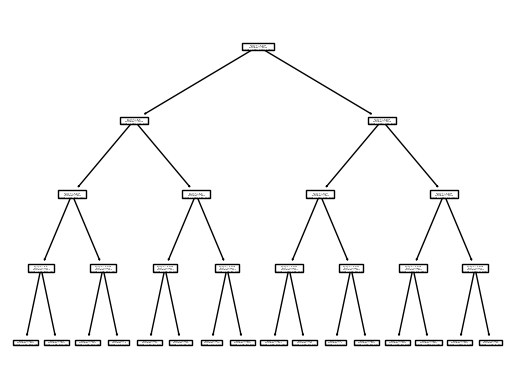

In [66]:
# ii. Abalone
dtc_abalone.fit(X_abaloneTrain, y_abaloneTrain)
tree.plot_tree(dtc_abalone)

#### 4b Top DT

In [67]:
dt_params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

# i. Penguins
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=dt_params_grid)

grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
best_dt_classifier_penguins = grid_search_penguins.best_estimator_
best_dt_classifier_penguins_params = grid_search_penguins.best_params_
print(best_dt_classifier_penguins.get_params()['criterion'], best_dt_classifier_penguins.get_params()['max_depth'], best_dt_classifier_penguins.get_params()['min_samples_split'])

# best_dt_classifier_penguins.fit(X_penguinsTest, y_penguinsTest)
# tree.plot_tree(grid_search.best_estimator_)


# FOR LATER IN STEP 6
# accuracy = best_dt_classifier_penguins.score(X_penguinsTrain, y_penguinsTrain)
# print('Penguins Decision Tree Accuracy: ', accuracy)

gini 4 2


In [68]:
# ii. Abalone

topDTC_abalone = tree.DecisionTreeClassifier(max_depth=6)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=dt_params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
best_dt_classifier_abalone = grid_search_abalone.best_estimator_

best_dt_classifier_abalone.fit(X_abaloneTest, y_abaloneTest)
# FOR LATER IN STEP 6
# accuracy = best_dt_classifier_abalone.score(X_abaloneTest, y_abaloneTest)
# print('Penguins Decision Tree Accuracy: ', accuracy)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### 4c Base MLP

In [80]:
mlp_penguins = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

# i. Penguins
mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain)
mlp_penguins.score(X_penguinsTest, y_penguinsTest)



0.4642857142857143

In [70]:
# ii. Abalone
mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)
mlp_abalone.score(X_abaloneTest, y_abaloneTest)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5330143540669856

#### 4d Top MLP

In [71]:
# d. TOP MLP
# i. Penguins

# Define the MLPClassifier
mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=200)

# Perform grid search
grid_search_mlp_penguins = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid)
grid_search_mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain)  # Replace with your training data variables

# Output the best parameters
# print("Best parameters set found on development set:")
# print(grid_search_mlp_penguins.best_params_)

# After fitting GridSearchCV to your data
# best_score = grid_search_mlp_penguins.best_score_

# Print the best score
# print(best_score)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

In [72]:
# d. TOP MLP
# ii. Abalons

# Define the MLPClassifier
mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=200)

# Perform grid search
grid_search_mlp_abalone = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid)
grid_search_mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)  # Replace with your training data variables

# Output the best parameters
# print("Best parameters set found on development set:")
# print(grid_search_mlp_abalone.best_params_)

# After fitting GridSearchCV to your data
# best_score = grid_search_mlp_abalone.best_score_

# Print the best score
# print(best_score)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

###  5 Model Evaluation

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np
import os.path

file_name_penguins = 'penguin-performance.txt'
file_name_abalone = 'abalone-performance.txt'

if os.path.exists(file_name_penguins):
# If file exists, then clear its contents
    with open(file_name_penguins, 'w') as file:
        file.seek(0)
        file.truncate()
        file.close()

if os.path.exists(file_name_abalone):
    with open(file_name_abalone, 'w') as file:
        file.seek(0)
        file.truncate()
        file.close()

def evaluate_model(title, classifier, X_train, y_train, X_test, y_test, file_name):
    # Fit the classifier
    # classifier.fit(X_train, y_train)
    
    # Predict on the test data
    predictions = classifier.predict(X_test)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    f1_macro = f1_score(y_test, predictions, average='macro')
    f1_weighted = f1_score(y_test, predictions, average='weighted')
    
    # Write to file
    with open(file_name, 'a') as file:
        # (A) Model Description
        file.write(f"\n{'_' * 80}\n")
        file.write(f"(A)\n")
        file.write(f"Model: {title}\n")
        if (title == 'Base-DT Abalone'):
            params = f"""Hyperparameters: {{'max_depth': {classifier.get_params()['max_depth']}}}\n"""
            file.write(params)
        elif (title == 'Top-DT Penguins' or title == 'Top-DT Abalone'):
            file.write(f"Hyperparameters modified: {dt_params_grid}\n")
            best_params = f"""Best hyperparameters: {{'criterion': {classifier.get_params()['criterion']}, 'max_depth': {classifier.get_params()['max_depth']}, 'min_samples_split': {classifier.get_params()['min_samples_split']}}}\n"""
            file.write(best_params)
        elif (title == 'Base-MLP Penguins' or title == 'Base-MLP Abalone' ):
            params = f"""Hyperparameters modified: {{'hidden_layer_sizes': {classifier.get_params()['hidden_layer_sizes']}, 'activation': {classifier.get_params()['activation']}, 'solver': {classifier.get_params()['solver']}}}\n"""
            file.write(params)
        elif (title == 'Top-MLP Penguins' or title == 'Top-MLP Abalone'):
            file.write(f"Hyperparameters modified: {mlp_param_grid}\n") 
            best_params = f"""Best hyperparameters: {{'activation': {classifier.get_params()['activation']}, 'hidden_layer_sizes': {classifier.get_params()['hidden_layer_sizes']}, 'solver': {classifier.get_params()['solver']}}}\n"""
            file.write(best_params)
            
        # (B) Confusion Matrix
        file.write(f"\n(B)\n")
        file.write("Confusion Matrix:\n")
        file.write(f"{np.array2string(cm)}\n")
        
        # (C) Classification Report
        file.write(f"\n(C)\n")
        file.write("Classification Report:\n")
        file.write(f"{classification_report(y_test, predictions)}\n")
        
        # (D) Accuracy and F1 Scores
        file.write(f"\n(D)\n")
        file.write(f"Accuracy: {accuracy:.4f}\n")
        file.write(f"Macro-average F1: {f1_macro:.4f}\n")
        file.write(f"Weighted-average F1: {f1_weighted:.4f}\n")
        file.write(f"{'_' * 80}\n")
        file.close()

#### Penguins

In [82]:
# Base-DT
evaluate_model('Base-DT Penguins', dtc_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Top-DT
evaluate_model('Top-DT Penguins', grid_search_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Base-MLP
evaluate_model('Base-MLP Penguins', mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Top-MLP
evaluate_model('Top-MLP Penguins', grid_search_mlp_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

#### Abalone

In [85]:
# Base-DT
evaluate_model('Base-DT Abalone', dtc_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Top-DT
evaluate_model('Top-DT Abalone', grid_search_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Base-MLP
evaluate_model('Base-MLP Abalone', mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Top-MLP
evaluate_model('Top-MLP Abalone', grid_search_mlp_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

### 6 Average performance for each model

In [76]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming evaluate_model is a function that trains, predicts, and evaluates the model
# and returns a dictionary with accuracy, macro F1, and weighted F1.

def run_experiments(model, X_train, y_train, X_test, y_test):
    accuracies = []
    macro_f1s = []
    weighted_f1s = []
    
    # Run 5 experiments
    for i in range(5):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions, output_dict=True)
        
        accuracies.append(accuracy)
        macro_f1s.append(report['macro avg']['f1-score'])
        weighted_f1s.append(report['weighted avg']['f1-score'])
        
    # Calculate the means and variances
    accuracy_mean, accuracy_var = np.mean(accuracies), np.var(accuracies)
    macro_f1_mean, macro_f1_var = np.mean(macro_f1s), np.var(macro_f1s)
    weighted_f1_mean, weighted_f1_var = np.mean(weighted_f1s), np.var(weighted_f1s)
    
    # Return the results as a dictionary
    return {
        'accuracy_mean': accuracy_mean, 'accuracy_var': accuracy_var,
        'macro_f1_mean': macro_f1_mean, 'macro_f1_var': macro_f1_var,
        'weighted_f1_mean': weighted_f1_mean, 'weighted_f1_var': weighted_f1_var
    }

# Function to calculate the mean and variance of the evaluation metrics
# def calculate_mean_variance(results):
#     mean_variance = {}
#     for key, value in results.items():
#         mean_variance[f'{key}_mean'] = np.mean(value)
#         mean_variance[f'{key}_var'] = np.var(value)
#     return mean_variance

def append_to_file(filename, model_name, results):
    with open(filename, 'a') as file:
        file.write(f'\n--- {model_name} ---\n')
        for metric, value in results.items():
            file.write(f'{metric}: {value:.4f}\n')
        file.close()

#### Penguins 

In [77]:
# Penguins

# Base-DT
results = run_experiments(dtc_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Base-DT', results)

# Top-DT
best_dt_penguins = grid_search_penguins.best_estimator_

penguin_metrics = run_experiments(best_dt_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Top-DT', penguin_metrics)

# Base-MLP
penguin_metrics = run_experiments(mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Base-MLP', penguin_metrics)

# Top-MLP
best_mlp_penguins = grid_search_mlp_penguins.best_estimator_

penguin_metrics = run_experiments(best_mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Top-MLP', penguin_metrics)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

#### Abalone

In [78]:
# Abalone

# Base-DT
# base_dt_abalone = tree.DecisionTreeClassifier()
results = run_experiments(dtc_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Base-DT', results)

# Top-DT
best_dt_abalone = grid_search_abalone.best_estimator_

abalone_metrics = run_experiments(best_dt_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Top-DT', abalone_metrics)

# Base-MLP
abalone_metrics = run_experiments(mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Base-MLP', abalone_metrics)

# Top-MLP for Abalone
best_mlp_abalone = grid_search_mlp_abalone.best_estimator_

abalone_metrics = run_experiments(best_mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Top-MLP', abalone_metrics)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no p